In [240]:
import numpy as np
import keras
from keras import layers
import cv2 as cv
import os
import matplotlib.pyplot as plt 
from keras.preprocessing import image
import keras.utils as image
from keras.layers import BatchNormalization


In [241]:
#! unzip /content/catt.zip

In [242]:
train_images = sorted(os.listdir('/content/cat'))

In [243]:
train_image = []
for im in train_images:
    img = image.load_img("/content/cat/"+ im, target_size=(64,64), color_mode= 'rgb')
    img = image.img_to_array(img)
    train_image.append(img)
train_df = np.array(train_image)

In [244]:
train_df = train_df.astype('float32')/255
train_df.shape


(500, 64, 64, 3)

In [245]:
x_train= train_df[0:300]
x_test= train_df[300:]
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


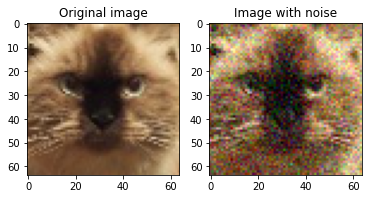

In [246]:
idx = 3
plt.subplot(1,2,1)
plt.imshow(x_train[idx].reshape(64,64,3))
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(x_train_noisy[idx].reshape(64,64,3))
plt.title('Image with noise')
plt.show()

In [ ]:
input_img = keras.Input(shape=(64, 64, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(23, (3, 3), activation='relu', padding='same')(x)
#x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same',name="encoded")(x)


x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

In [265]:
autoencoder.fit(x_train_noisy, x_train,batch_size=64, epochs=10,validation_data=(x_test_noisy, x_test))

Epoch 1/10
5/5 [==============================] - 0s 63ms/step - loss: 0.5552 - val_loss: 0.5535
Epoch 2/10
5/5 [==============================] - 0s 44ms/step - loss: 0.5544 - val_loss: 0.5523
Epoch 3/10
5/5 [==============================] - 0s 40ms/step - loss: 0.5538 - val_loss: 0.5532
Epoch 4/10
5/5 [==============================] - 0s 45ms/step - loss: 0.5540 - val_loss: 0.5522
Epoch 5/10
5/5 [==============================] - 0s 39ms/step - loss: 0.5539 - val_loss: 0.5532
Epoch 6/10
5/5 [==============================] - 0s 38ms/step - loss: 0.5538 - val_loss: 0.5519
Epoch 7/10
5/5 [==============================] - 0s 39ms/step - loss: 0.5534 - val_loss: 0.5523
Epoch 8/10
5/5 [==============================] - 0s 40ms/step - loss: 0.5532 - val_loss: 0.5518
Epoch 9/10
5/5 [==============================] - 0s 39ms/step - loss: 0.5530 - val_loss: 0.5518
Epoch 10/10
5/5 [==============================] - 0s 38ms/step - loss: 0.5530 - val_loss: 0.5518


In [266]:
decoded_imgs = autoencoder.predict(x_test_noisy)

7/7 [==============================] - 0s 7ms/step


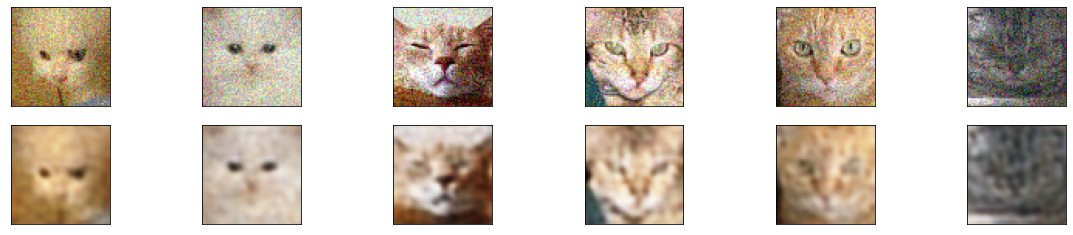

In [267]:
import matplotlib.pyplot as plt

n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(64, 64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [268]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [269]:
encoded_imgs.shape

(200, 16, 16, 64)

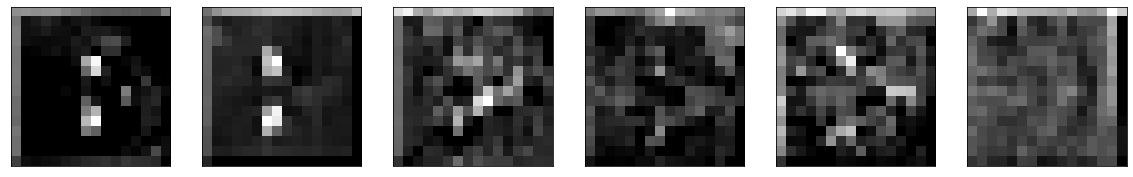

In [270]:
n = 6
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].reshape((16, 16)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [274]:
encoded_input = keras.Input(shape=(16, 16, 64))
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.summary()

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 16, 16, 64)]      0         
                                                                 
 conv2d_204 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 up_sampling2d_46 (UpSamplin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_205 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 up_sampling2d_47 (UpSamplin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_206 (Conv2D)         (None, 64, 64, 3)         867

In [279]:
k = 0
for i in range (6,10):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1
decoded_imgs = decoder.predict(encoded_imgs)

7/7 [==============================] - 0s 4ms/step


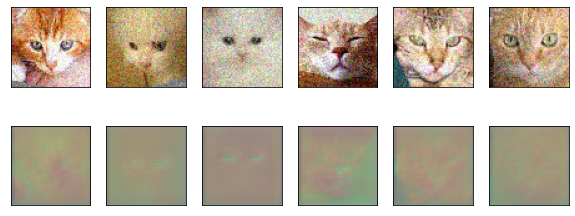

In [280]:
import matplotlib.pyplot as plt

n = 6  # How many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(64,64,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()